In [1]:
"""
Created on Fri Apr 26 14:28:18 2019

#Mst. Mahfuja Akter
#Maryam Assaedi
#Mahpara Hyder Chowdhury
"""

#a
import pandas as pd
df = pd.read_excel("breast-cancer-wisconsin.xlsx")

data = pd.isna(df)
df[data] = 0
print(df)

        code  thickness  uniCelS  uniCelShape  marAdh  epiCelSize  bareNuc  \
0    1000025          5        1            1       1           2      1.0   
1    1002945          5        4            4       5           7     10.0   
2    1015425          3        1            1       1           2      2.0   
3    1016277          6        8            8       1           3      4.0   
4    1017023          4        1            1       3           2      1.0   
5    1017122          8       10           10       8           7     10.0   
6    1018099          1        1            1       1           2     10.0   
7    1018561          2        1            2       1           2      1.0   
8    1033078          2        1            1       1           2      1.0   
9    1033078          4        2            1       1           2      1.0   
10   1035283          1        1            1       1           1      1.0   
11   1036172          2        1            1       1           

[0.68846327 0.76272114 0.82343024 0.86737153 0.90610211 0.94086948
 0.96603724 0.98861572 1.        ]


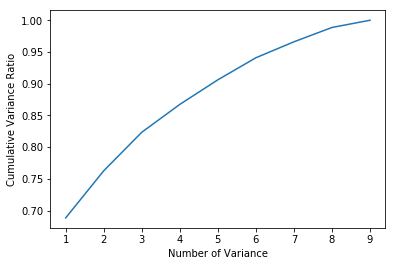

In [6]:
#b
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df2 = df.drop(['code','class'], axis=1)

pca  = PCA(n_components = 9)
principalComponents = pca.fit_transform(df2)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principalComponent1','principalComponent2','principalComponent3','principalComponent4','principalComponent5','principalComponent6','principalComponent7','principalComponent8','principalComponent9'])

x = [1,2,3,4,5,6,7,8,9]
y = np.cumsum(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Cumulative Variance Ratio")
plt.xlabel("Number of Variance")
plt.plot(x,y)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


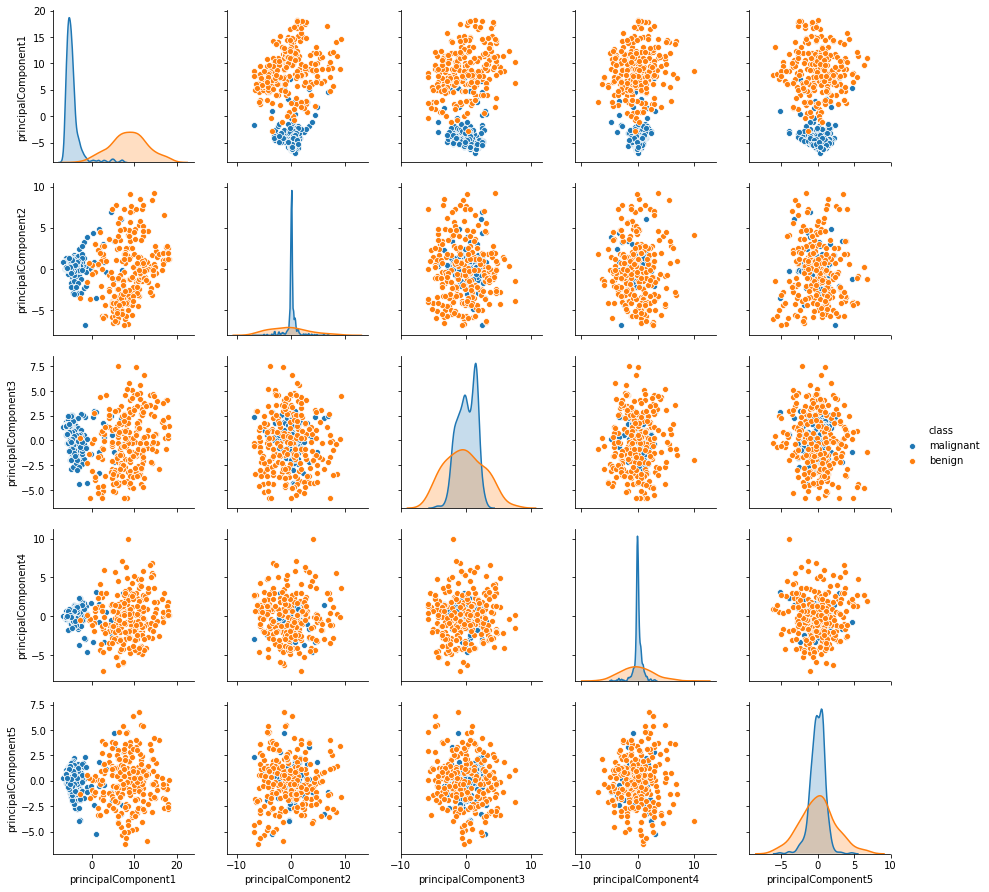

In [7]:
#c
newDf = principalDf.drop(['principalComponent6','principalComponent7','principalComponent8','principalComponent9'], axis=1)
df['class'].replace([2,4],['malignant','benign'], inplace = True)
finalDf = pd.concat([newDf, df[['class']]], axis = 1)
sns.pairplot(finalDf, hue = "class")

In [8]:
#d
print(max(finalDf['principalComponent1']))
print(min(finalDf['principalComponent4']))
maxweight = finalDf['principalComponent1']>18.13
minweight = finalDf['principalComponent4']<-7.07
print(finalDf[maxweight])
print(finalDf[minweight])
print(df.loc[425])
print(df.loc[288])

18.147913518253638
-7.076156207949006
     principalComponent1  principalComponent2  principalComponent3  \
425            18.147914             1.243211             1.424005   

     principalComponent4  principalComponent5   class  
425             0.121225             0.071419  benign  
     principalComponent1  principalComponent2  principalComponent3  \
288             2.727066             1.805272            -0.877426   

     principalComponent4  principalComponent5   class  
288            -7.076156            -1.129282  benign  
code           1258549
thickness            9
uniCelS             10
uniCelShape         10
marAdh              10
epiCelSize          10
bareNuc             10
blaChroma           10
normNuc             10
mitoses              1
class           benign
Name: 425, dtype: object
code           543558
thickness           6
uniCelS             1
uniCelShape         3
marAdh              1
epiCelSize          4
bareNuc             5
blaChroma           5
no

     principalComponent1  principalComponent2  principalComponent3  \
167             8.531399             4.130002            -1.954247   

     principalComponent4  principalComponent5   class  
167             9.959731            -3.931444  benign  


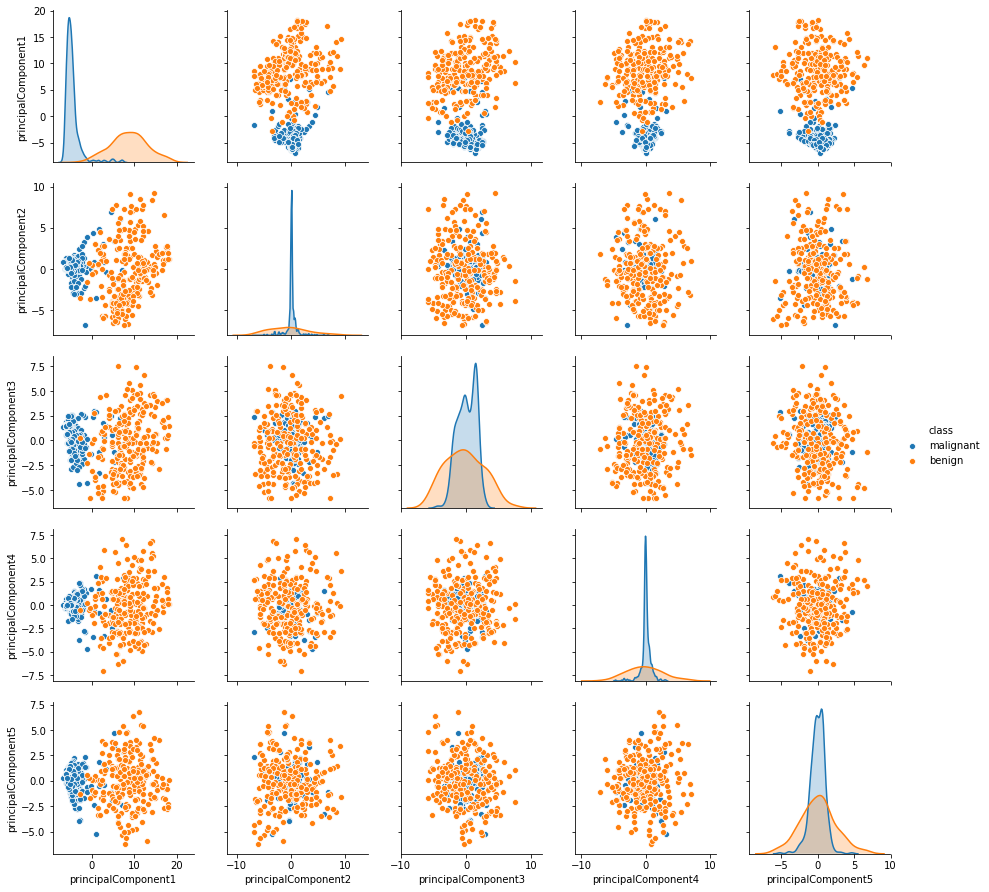

In [9]:
#e
maxBenignData = principalDf['principalComponent4']>9.8
print(finalDf[maxBenignData])
finalDf = finalDf.drop(finalDf.index[167])

sns.pairplot(finalDf, hue = "class")

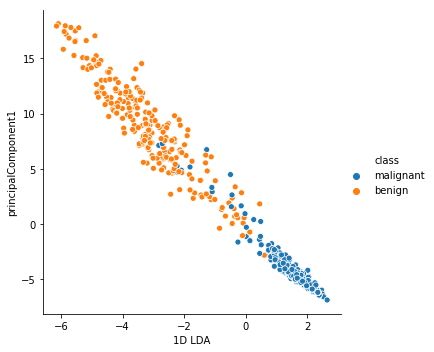

In [10]:
#g
import matplotlib.cm as cm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X = df.iloc[:, 1:10].values
y = df.iloc[:, 10].values
lda = LDA(n_components=1) 
lda = lda.fit(X,y).transform(X)

newLdaDf = pd.DataFrame(data = lda, columns = ['1D LDA'])
ldadf = pd.concat([newLdaDf, principalDf['principalComponent1'],df[['class']]], axis = 1)

ax = sns.relplot(x="1D LDA", y = "principalComponent1", hue="class", data = ldadf)
plt.show(ax)